In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

In [12]:
test = pd.concat([xtest, ytest], axis=1)
# Generar columna predicción
test['ypred'] = 0

# Predeciremos que el valor que toma la variable 
# objetivo es siempre 0, ya que acertaremos más de un 
# 98% de las veces.
test.fatality.value_counts()

0    997353
1     15369
Name: fatality, dtype: int64

In [16]:
print("Classification Report")
print(classification_report(test['fatality'], test['ypred']))

Classification Report


C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    997353
           1       0.00      0.00      0.00     15369

    accuracy                           0.98   1012722
   macro avg       0.49      0.50      0.50   1012722
weighted avg       0.97      0.98      0.98   1012722



C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
recall_score(test['fatality'], test['ypred'])

0.0

In [21]:
precision_score(test['fatality'], test['ypred'])

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [28]:
accuracy_score(test['fatality'], test['ypred'])

0.9848240682043048

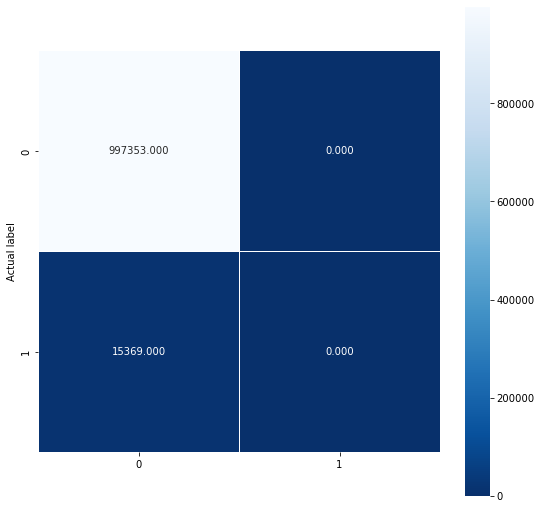

In [40]:
cm_gbt = confusion_matrix(test['fatality'], test['ypred'])

plt.figure(figsize=(9,9))
sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');

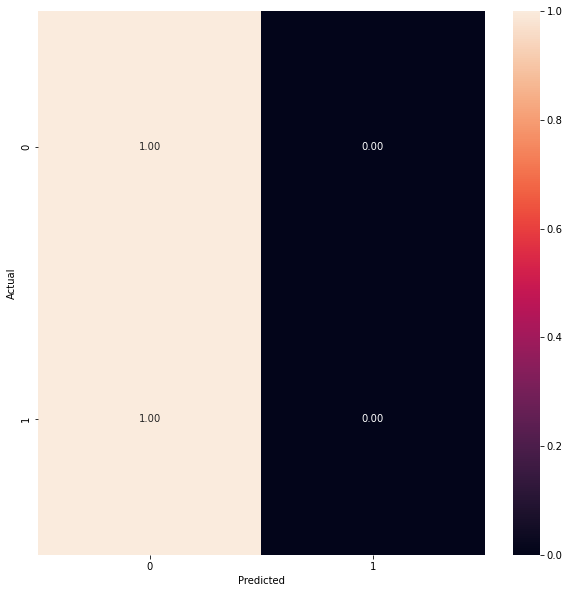

In [39]:
cm = confusion_matrix(test['fatality'], test['ypred'])
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)